# (Ford Gobike Share)
## by (Ahmed Lotfy)

## Preliminary Wrangling

> "This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area" for the period of Februry 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
%matplotlib inline

from scipy.stats import norm
from matplotlib import rcParams
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# Importing The dataset:

> ##### Define: Load the dataset

In [2]:
#importing the dataset:
origin_f_b= pd.read_csv("201902-fordgobike-tripdata.csv")

##### Test:

In [3]:
display("Head of the dataset", origin_f_b.head(5))
display("sample of the dataset", origin_f_b.sample(5))
display("Tail of the dataset", origin_f_b.tail(5))

'Head of the dataset'

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


'sample of the dataset'

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
23986,906,2019-02-25 18:54:18.7170,2019-02-25 19:09:25.2590,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,22.0,Howard St at Beale St,37.789756,-122.394643,2262,Subscriber,1987.0,Female,No
127940,106,2019-02-10 14:37:23.1320,2019-02-10 14:39:09.6470,281.0,9th St at San Fernando St,37.338395,-121.880797,280.0,San Fernando St at 7th St,37.337122,-121.883215,2143,Subscriber,1995.0,Male,Yes
111004,286,2019-02-12 17:33:27.2700,2019-02-12 17:38:13.5310,223.0,16th St Mission BART Station 2,37.764765,-122.420091,120.0,Mission Dolores Park,37.761420,-122.426435,4717,Subscriber,1980.0,Male,No
42585,1421,2019-02-22 17:09:53.2240,2019-02-22 17:33:34.5420,151.0,53rd St at Hollis St,37.836182,-122.287180,258.0,University Ave at Oxford St,37.872355,-122.266447,5244,Subscriber,1986.0,Male,No
11618,879,2019-02-27 18:18:51.1070,2019-02-27 18:33:30.8430,350.0,8th St at Brannan St,37.771431,-122.405787,121.0,Mission Playground,37.759210,-122.421339,4991,Subscriber,1989.0,Male,No


'Tail of the dataset'

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


## Dataset Assissment:

In [4]:
# high-level overview of data shape and composition:
display("Info of the bikeshare dataset",origin_f_b.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

'Info of the bikeshare dataset'

None

In [5]:
display("Structure of the bikeshare dataset", origin_f_b.shape)

'Structure of the bikeshare dataset'

(183412, 16)

In [6]:
display("Types of data in the dataset", origin_f_b.dtypes)

'Types of data in the dataset'

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [7]:
# listing dataset columns names:
display("Features of the dataset",origin_f_b.columns)

'Features of the dataset'

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [8]:
# Getting general statistical description:
display("General Statistical Description", origin_f_b.describe())

'General Statistical Description'

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
#checking for missing values:
display(origin_f_b.isna().sum())
# drop the column that do not have any NaN/None values
nan_counts = origin_f_b.drop(['duration_sec', 'start_time', 'end_time', 'start_station_latitude',
       'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'bike_share_for_all_trip'], axis=1).isna().sum()

# Counts of nan values in each column:
display("Number of nan values in each column is",nan_counts)

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

'Number of nan values in each column is'

start_station_id       197
start_station_name     197
end_station_id         197
end_station_name       197
member_birth_year     8265
member_gender         8265
dtype: int64

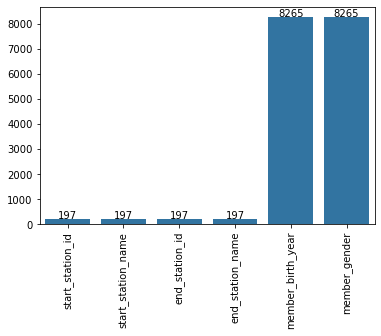

In [10]:
# Plotting the bar chart from NaN tabular data including values on each bar via seaborn library:
basic_color = sb.color_palette()[0]

# getting the current tick locations and labels
plt.xticks(rotation=90);


sb.barplot(nan_counts.index.values, nan_counts, color= basic_color);

# Logic to print value on each bar
for i in range (nan_counts.shape[0]):
    count = nan_counts[i]
    # Refer here for details of the text()
    plt.text(i, count+350,
             count, ha = 'center',
             va='top')

In [11]:
# Find the porportion of the nans to not nans in each column:
total= origin_f_b.shape[0]
X= nan_counts.start_station_id / total
Y= nan_counts.member_birth_year/ total
display("Proportions of Nan values in the dataset",X, Y)

'Proportions of Nan values in the dataset'

0.0010740845746188908

0.04506248228033062

> Visual and programatical insights:
- since the Nan values proportions less than (0.05) i intend to drop those records.

In [12]:
# checking for duplicated values:
origin_f_b.duplicated().sum()

0

> #### User_type Values counts

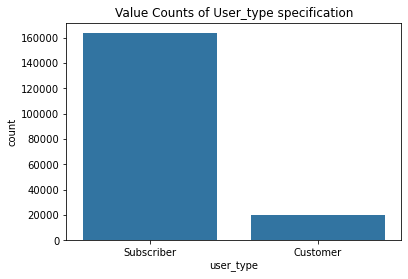

In [13]:
# Dynamic ordering of the bars in a bar chart :

# Count the frequency of each unique value in the "user_type" column, and sort it in descending order
# Returns a Series

freqs = origin_f_b["user_type"].value_counts()


# Get the indexes of the Series

users_order = freqs.index

# Plot the bar chart in the decreasing order of the frequency of the "column"

sb.countplot(data=origin_f_b, x="user_type", color=basic_color, order=users_order);
plt.title("Value Counts of User_type specification");

> #### member_gender Values counts

'member_gender column values counts'

member_gender
Male             130651
Female            40844
Other              3652
dtype: int64

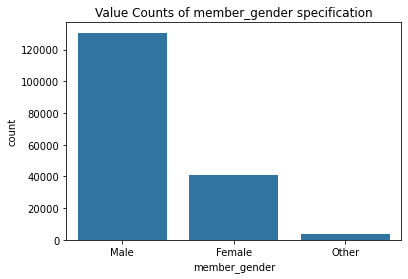

In [14]:
# Count the frequency of each unique value in the "user_type" column, and sort it in descending order
# Returns a Series

freqs = origin_f_b["member_gender"].value_counts()


# Get the indexes of the Series

genders_order = freqs.index

# Plot the bar chart in the decreasing order of the frequency of the "column"

sb.countplot(data=origin_f_b, x="member_gender", color=basic_color, order=genders_order);
plt.title("Value Counts of member_gender specification");

display("member_gender column values counts", origin_f_b.value_counts(subset= ["member_gender"], sort= True ))

> #### bike_share_for_all_trip Values counts

'bike_share_for_all_trip column values counts'

bike_share_for_all_trip
No                         166053
Yes                         17359
dtype: int64

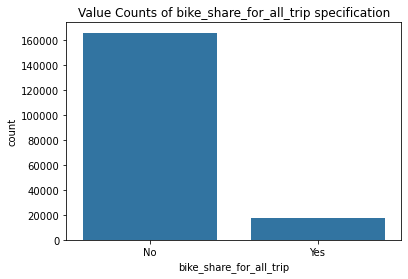

In [15]:
# Count the frequency of each unique value in the "user_type" column, and sort it in descending order
# Returns a Series

freqs = origin_f_b["bike_share_for_all_trip"].value_counts()


# Get the indexes of the Series

alltrip_order = freqs.index

# Plot the bar chart in the decreasing order of the frequency of the "column"

sb.countplot(data=origin_f_b, x="bike_share_for_all_trip", color=basic_color, order=alltrip_order);
plt.title("Value Counts of bike_share_for_all_trip specification");

display("bike_share_for_all_trip column values counts",
        origin_f_b.value_counts(subset= ["bike_share_for_all_trip"], sort= True ))

In [16]:
# Number of Start stations:

display("Number of the start stations is: ", origin_f_b.start_station_id.nunique())

'Number of the start stations is: '

329

In [17]:
# Number of end stations:

display("Number of the end stations is: ", origin_f_b.end_station_id.nunique())

'Number of the end stations is: '

329

In [18]:
# Number of Unique bikes:


display("Number of the bikes is: ", origin_f_b.bike_id.nunique())

'Number of the bikes is: '

4646

### What is the structure of your dataset?

> Ford_go_bike dataset includes (183412) trips which have (16) specifications distributed into the following aspects:

- **Duration**: ("duration_sec") = 1 Feature.


- **Time**: ("start_time", "end_time") = 2 Features.

- **Place**:
    ("start_station_id", "start_station_name", "start_station_latitude", "start_station_longitude", "end_station_id",
     "end_station_name", end_station_latitude", "end_station_longitude")= 8 features.

- **User**: ("user_type", "member_birth_year", "member_gender", "bike_share_for_all_trip")= 4 Features.

- **Bike**: ('bike_id') = 1 Feature.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in the dataset is "User_type" and "Duration"!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that help in investigation are:
- "member_birth_year", "member_gender", "start_time", "end_time !

## Dataset Cleaning:

> ### Assesment Obvservations:

1- Coordinates of both start stations and end stations is irrelevant to our targeted analysis, so the should be elemenated:

- Elemenate: ["start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude"]

2-  Duration data is per seconds , it should be converted to duration per minutes to facilitate interpretation of the analysis:

- Add column contains duration per minutes.

3- Date data should be distributed into: start hour of day, day of week, month of year

- Add columns contains: "hour", "day".

4-Current users ages should be extracted from "member_birth_year" column:

- Calculate current users ages based on birth year data.

5- Dealing with data types issues: the following data types should be converted to:

- start_time                  to (datetime)
- end_time                    to (datetime)
- user_type                   to (Catagory)
- member_gender               to (Catagory)
- bike_share_for_all_trip     to (Catagory)

6- Nan values should be removed since its porportion less than 0.05:

- Drop Nan values.

> #### - Tiddiness Issues:

#### 1- Drop errelevante specifications columns: 

> **Define:**  

Drop the following columns: ["start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude"] from a copy of the original dataframe

> **Code:**

In [19]:
# first we make a new copy from the original dataframe:

cleaning_ford_bike= origin_f_b.copy()
display(cleaning_ford_bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

None

In [20]:
cleaning_ford_bike.drop(["start_station_latitude","start_station_longitude",
                         "end_station_latitude","end_station_longitude"],axis= 1, inplace= True)

> **Test:**

In [21]:
display(cleaning_ford_bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   end_station_id           183215 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   bike_id                  183412 non-null  int64  
 8   user_type                183412 non-null  object 
 9   member_birth_year        175147 non-null  float64
 10  member_gender            175147 non-null  object 
 11  bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 16.8+ MB


None

#### 2- Duration per seconds should be converted to duration per minutes to facilitate interpretation of the analysiss: 

> **Define:**  

Add column contains duration per minutes and round float values

> **Code:**

In [22]:
# i will devide values in seconds on 60 which is the values of minutes
cleaning_ford_bike["duration_in_minutes"]= cleaning_ford_bike["duration_sec"]/60

cleaning_ford_bike["duration_in_minutes"]= round(cleaning_ford_bike.duration_in_minutes, None)

> **Test:**

In [23]:
# Checkin via showing samples of data and information about the dataset:
display(cleaning_ford_bike.duration_in_minutes.head(5))
display(cleaning_ford_bike.info())

0     870.0
1     709.0
2    1031.0
3     608.0
4      26.0
Name: duration_in_minutes, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   end_station_id           183215 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   bike_id                  183412 non-null  int64  
 8   user_type                183412 non-null  object 
 9   member_birth_year        175147 non-null  float64
 10  member_gender            175147 non-null  object 
 11  bike_share_for_all_trip  183412 non-null  object 
 12  duration_in_minutes      183412 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 18.2+ MB


None

#### 3- Current users ages should be extracted from "member_birth_year" column: 

> **Define:**  

Calculate current users ages based on birth year data and round its values to facilitate calculation.

> **Code:**

In [24]:
# Substraction and rounding
cleaning_ford_bike["user_age"]= 2021- cleaning_ford_bike["member_birth_year"]
cleaning_ford_bike["user_age"]= round(cleaning_ford_bike.user_age, None)

> **Test:**

In [25]:
# Show sample from adjusted dataset:
display(cleaning_ford_bike.user_age.head(10))
display(cleaning_ford_bike.head())

0    37.0
1     NaN
2    49.0
3    32.0
4    47.0
5    62.0
6    38.0
7    32.0
8    33.0
9    29.0
Name: user_age, dtype: float64

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_in_minutes,user_age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,870.0,37.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,709.0,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,1031.0,49.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,608.0,32.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,26.0,47.0


#### 4- Dealing with data type issues: 

> **Define:**  

Several Data types should be converted as the following.

> **Code:**

In [26]:
# First data types which should be converted to datetime type pandas function pd.to_datetime:
cleaning_ford_bike.start_time= pd.to_datetime(cleaning_ford_bike.start_time)
cleaning_ford_bike.end_time= pd.to_datetime(cleaning_ford_bike.end_time)

> **Test:**

In [27]:
# checking by showing samples from the dataset:
display(cleaning_ford_bike.info())
display(cleaning_ford_bike.head(10))
display(cleaning_ford_bike.start_time.value_counts(ascending= False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183215 non-null  float64       
 6   end_station_name         183215 non-null  object        
 7   bike_id                  183412 non-null  int64         
 8   user_type                183412 non-null  object        
 9   member_birth_year        175147 non-null  float64       
 10  member_gender            175147 non-null  object        
 11  bike_share_for_all_trip  183412 non-null  object        
 12  duration_in_minu

None

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_in_minutes,user_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,870.0,37.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,709.0,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,1031.0,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,608.0,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,26.0,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,30.0,62.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No,19.0,38.0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989.0,Male,No,27.0,32.0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548,Subscriber,1988.0,Other,No,26.0,33.0
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,121.0,Mission Playground,6488,Subscriber,1992.0,Male,No,17.0,29.0


2019-02-01 13:40:09.492    2
2019-02-11 17:05:07.840    2
2019-02-19 17:52:44.175    2
2019-02-01 18:24:34.874    2
2019-02-22 20:11:42.256    2
                          ..
2019-02-22 08:46:15.436    1
2019-02-19 17:29:08.242    1
2019-02-11 10:24:37.610    1
2019-02-20 08:02:52.933    1
2019-02-15 07:01:31.319    1
Name: start_time, Length: 183401, dtype: int64

> **Code:**

In [28]:
# Second data types should be converted into "category", using for loop and astype function
colmns = ["user_type","member_gender","bike_share_for_all_trip"]
for col in colmns:
    cleaning_ford_bike[col] = cleaning_ford_bike[col].astype("category")

> **Test:**

In [29]:
display(cleaning_ford_bike.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
end_station_id                    float64
end_station_name                   object
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
duration_in_minutes               float64
user_age                          float64
dtype: object

#### 5- Date data should be distributed into: start hour of day, day of week, month of year: 

> **Define:**  

Extracting date data into columns contain: "hour", "day", "month".

> **Code:**

In [30]:
# Using pandas.Series.dt attributes:
#***
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
#***
cleaning_ford_bike["st_date"] = cleaning_ford_bike.start_time.dt.strftime("%Y-%m-%d")
cleaning_ford_bike["st_month"] = cleaning_ford_bike.start_time.dt.strftime("%b")
cleaning_ford_bike["s_day"] = cleaning_ford_bike.start_time.dt.strftime("%a")
cleaning_ford_bike["st_hour"] = cleaning_ford_bike.start_time.dt.strftime("%H")
cleaning_ford_bike["en_hour"] = cleaning_ford_bike.end_time.dt.strftime("%H")

> **Test:**

In [31]:
display(cleaning_ford_bike.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
end_station_id                    float64
end_station_name                   object
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
duration_in_minutes               float64
user_age                          float64
st_date                            object
st_month                           object
s_day                              object
st_hour                            object
en_hour                            object
dtype: object

#### 6- Nan values should be removed since its porportion less than 0.05: 

> **Define:**  

Drop Nan Values.

> **Code:**

In [32]:
# Drop all of Nan values from the dataset:
cleaning_ford_bikes=cleaning_ford_bike.copy()
cleaning_ford_bikes.dropna(inplace= True)

> **Test:**

In [33]:
# Recalculate the nan values
display(cleaning_ford_bikes.isna().sum())

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_in_minutes        0
user_age                   0
st_date                    0
st_month                   0
s_day                      0
st_hour                    0
en_hour                    0
dtype: int64

In [34]:
# Saving the cleaned dataset into separated file:

cleaning_ford_bikes.to_csv("Master_ford_bike_share.csv", index= False )

In [35]:
# Checking the saved csv file and loading the data to explore it

ford_bike_share= pd.read_csv("Master_ford_bike_share.csv")
display(ford_bike_share.head(5), ford_bike_share.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   end_station_id           174952 non-null  float64
 6   end_station_name         174952 non-null  object 
 7   bike_id                  174952 non-null  int64  
 8   user_type                174952 non-null  object 
 9   member_birth_year        174952 non-null  float64
 10  member_gender            174952 non-null  object 
 11  bike_share_for_all_trip  174952 non-null  object 
 12  duration_in_minutes      174952 non-null  float64
 13  user_age                 174952 non-null  float64
 14  st_d

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_in_minutes,user_age,st_date,st_month,s_day,st_hour,en_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,870.0,37.0,2019-02-28,Feb,Thu,17,8
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,1031.0,49.0,2019-02-28,Feb,Thu,12,5
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,608.0,32.0,2019-02-28,Feb,Thu,17,4
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,26.0,47.0,2019-02-28,Feb,Thu,23,0
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,30.0,62.0,2019-02-28,Feb,Thu,23,0


None

## Univariate Exploration


> **First i will be looking at the distribution of main variable of interest: "Duration" of the trips not per seconds but per minutes**

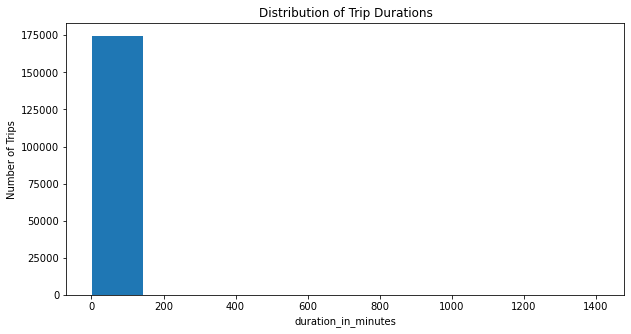

In [36]:
# Plotting duration per minutes via seaborn countpolt:
fig= plt.figure(figsize=[10,5]);
ax = plt.gca()
base_color = sb.color_palette()[0]
plt.hist(data = ford_bike_share, x = "duration_in_minutes");
plt.title("Distribution of Trip Durations");
plt.xlabel("duration_in_minutes");
plt.ylabel("Number of Trips");
plt.show();

> - **Visual insight**:

- The Majority of the trips durations were quite short (within 200 mins). so i intend to zoom in to the most cases for a closer depicting of what the distributions look like.

In [37]:
# Using Describe() to gauge what minimum and maximum bin limits might be appropriate for the plot.
# These bin edges can be set using numpy's arange function:
display("Propotions of the trips durations ",
        ford_bike_share["duration_in_minutes"].describe(datetime_is_numeric=True, percentiles= [.99]))

'Propotions of the trips durations '

count    174952.000000
mean         11.733224
std          27.372059
min           1.000000
50%           8.000000
99%          53.000000
max        1409.000000
Name: duration_in_minutes, dtype: float64

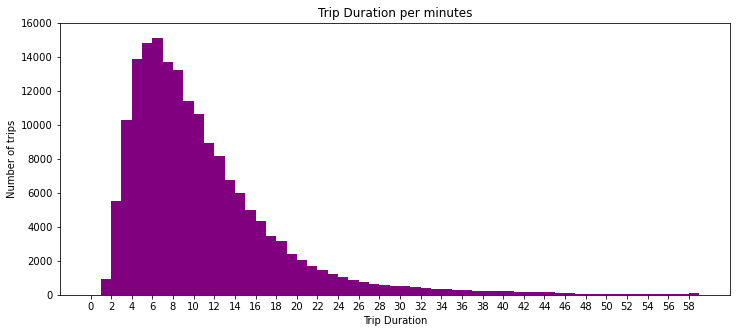

In [38]:
# Set the figure coordinates:
# Specify the figure size in inches, for both X, and Y axes:
# *******
# https://classroom.udacity.com/nanodegrees/nd002-mena-nfp3/parts/211104e3-a5bc-4247-87b7-06bfa757806c/modules/884648ee-be0a-4bde-853f-26e97458edc8/lessons/b86503df-e416-4f0e-9e2d-a7a3c08d0bc3/concepts/bd9948e9-eda5-48b7-8c6f-e97192a9ac48
# *******
plt.rcParams['figure.figsize'] = 12, 5

# Set the bins and ticks range:
bins= np.arange(0, 60, 1)
ticks = np.arange(0, 60, 2)

plt.hist(data=ford_bike_share, x="duration_in_minutes", bins=bins, rwidth= 1, color= "purple");
plt.xticks(ticks, ticks);
plt.ylim(0, 16000);
plt.xlabel("Trip Duration");
plt.ylabel("Number of trips");
plt.title("Trip Duration per minutes");

> **Visual insight:**

**Since trip duration distribution has right skwed shape which means that lots of points refer to low values, with a very long tail of points refer to large values:
Most trips duration approximately in range (3-12) minutes. And very few trips duration lasted more than one hour (60 minutes)**

> **- Second i will be looking at "Time of trip" distribution which means looking at "Start hour of the day" also "End hour of the day" distributions**

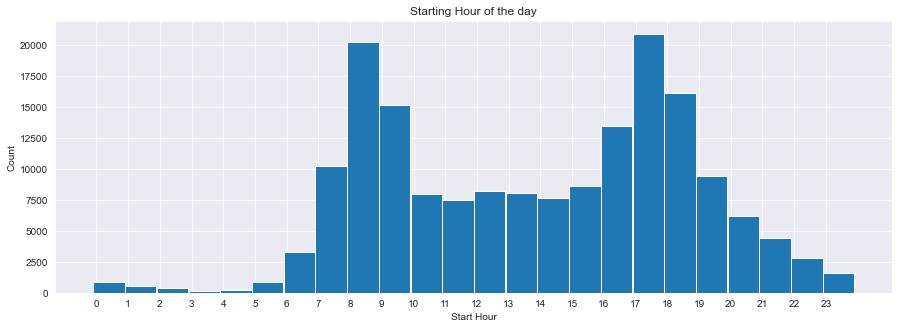

In [39]:
# Define the figure size
plt.figure(figsize = [15, 5])
sb.set_style("darkgrid")
bin_edges = np.arange(-0.1, 23.59+1, 1)
plt.hist(data = ford_bike_share, x = "st_hour", bins = bin_edges, rwidth = 0.99)
plt.xticks(np.arange(0, 23+1, 1))
plt.xlabel("Start Hour");
plt.ylabel("Count")
plt.title("Starting Hour of the day");

> **Visual insight:**

- The distribution seems roughly bimodal (has two peaks) at (8 AM) and (5 PM). Further specified analysis could examine if that correlated to factor of being most of work days start and end around thoes times.

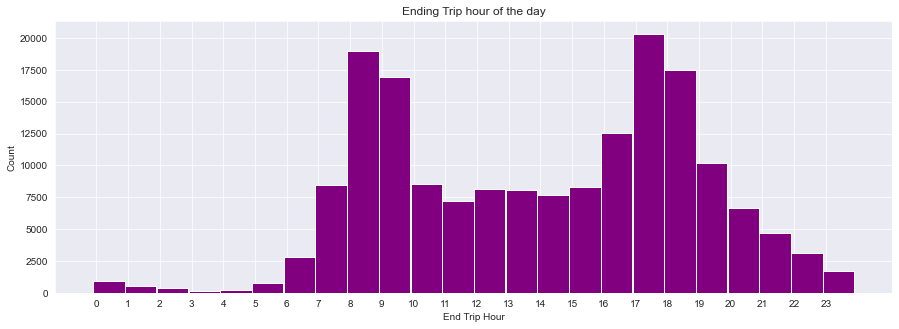

In [40]:
# Define the figure size
plt.figure(figsize = [15, 5])

bin_edges = np.arange(-0.1, 23.59+1, 1)
plt.hist(data = ford_bike_share, x = "en_hour", bins = bin_edges, rwidth = 0.99, color= "purple")
plt.xticks(np.arange(0, 23+1, 1))
plt.xlabel("End Trip Hour");
plt.ylabel("Count");
plt.title("Ending Trip hour of the day");

> **Visual insight:**
- The distribution of end trips hours also seems roughly bimodal (has two peaks) at (8 AM) and (5 PM). Which supports the Further specified analysis hypothesis that suggests: there is a positive correlation between times of trips and being most of work days start and end around those times.

> **- Third i will be looking at "date of trips" distribution which means looking at "Start day of the week" distributions**

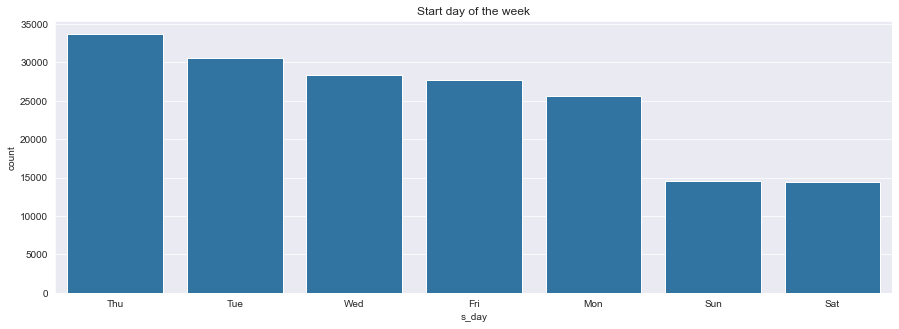

In [41]:
# Plotting using seaborn countplot:
plt.figure(figsize = [15, 5])
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
freq = ford_bike_share["s_day"].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=ford_bike_share, x="s_day",color= base_color, order=gen_order);

plt.title("Start day of the week");

> **Visual insight:**
- The distribution of "start day of week" trips date also seems related to "work days" [Monday-Friday] which supports giving priority to "going to Work" as a main purpose of using "ford gobike" service.

> **- Fourth i will be looking at "Ages of users" distributions**

Use the box plot

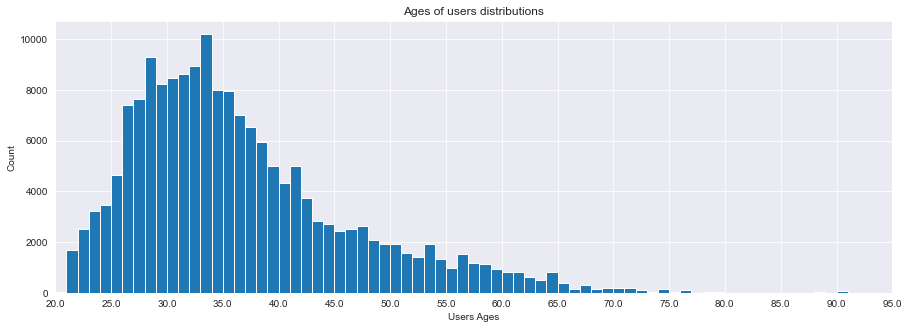

In [42]:
# Plottin hist graph:
plt.figure(figsize = [15, 5])
bins = np.arange(-5, ford_bike_share["user_age"].max()+5, 1)
ticks= np.arange(-5, ford_bike_share["user_age"].max()+5, 5)
plt.hist(data=ford_bike_share, x="user_age", bins=bins);
plt.xticks(ticks, ticks);
plt.xlim(20, 95);
plt.xlabel("Users Ages");
plt.ylabel("Count");
plt.title("Ages of users distributions");

In [43]:
# Will use statistical description to elemenate high values outliers:
ford_bike_share.user_age.describe(percentiles= [0.99])

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
50%          34.000000
99%          66.000000
max         143.000000
Name: user_age, dtype: float64

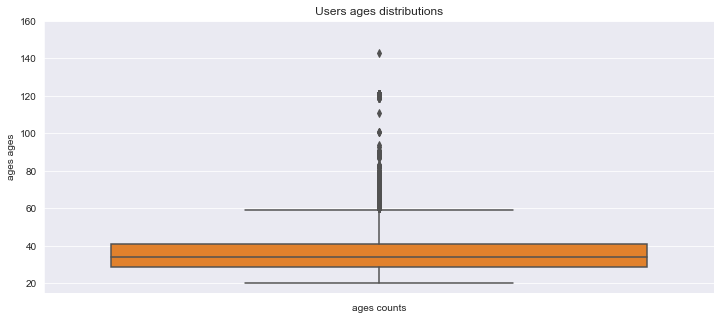

In [44]:
# i will revisualize based on statistical description:
base_color = sb.color_palette()[1]
sb.boxplot(data = ford_bike_share, y = "user_age", color = base_color, whis= 1.5)
plt.title("Users ages distributions")
plt.xlabel("ages counts")
plt.ylim(15,160)
plt.ylabel("ages ages")
plt.show()

> **Visual insight:**
- "Users ages" approximately seems in range (20 - 60) with few higher values outliers, about 75% of users is less than 40 years old, and 90% less than 60 years old which support the suggestion of going to work is a main purpose of using "ford gobike" service. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


> **"Duration" distributions:**

- Most trips duration approximately in range (3-12) minutes. And very few trips duration lasted more than one hour (60 minutes).


> **"Time" per hour of the day distributions:**

- The distribution seems roughly bimodal (has two peaks) at (8 - 9 AM) and (5 - 9 PM). Further specified analysis could examine if that correlated to factor of being most of work days start and end around thoes times.

- The distribution of end trips hours also has two peaks at (8 AM) and (5 PM). Which supports the Further specified analysis hypothesis that suggests: there is a positive correlation between times of trips and being most of work days start and end around those times.

> **"Date" per day of the week distributions:**

- The distribution of "start day of week" trips date also seems related to "work days" [Monday-Friday] which supports giving priority to "going to Work" as a main purpose of using "ford gobike" service.

> **"Users Ages" distributions:**

- "Users ages" approximately seems in range (20 - 60) with few higher values outliers, about 75% of users is less than 40 years old, and 90% less than 60 years old which support the suggestion of going to work is a main purpose of using "ford gobike" service

> **No transformation was needed luckily due to the straightforwardness of the data.**


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Many tideness and quality issues has been handled throw the cleaning process and documented previously, also the "duration per minutes" distribution needed to be zoomed in smaller range for clearer prospective, so i elemenated the high value outliers statistically then i restudied it.

## Bivariate Exploration

> I will go first with the User-wise prospective so i will focus first on:
- User type VS duration per minutes.
- User type VS Date.
- User type Vs Age

### 1- User type Vs duration per minutes distributions:

In [45]:
# i will compare the 2 variables programatically and visually:

customer= ford_bike_share.query("user_type == 'Customer'")
subscriber= ford_bike_share.query("user_type == 'Subscriber'")
display("Statistic description for customer user type", customer.duration_in_minutes.describe(percentiles= [0.95]))
display("Statistic description for subscriber user type", subscriber.duration_in_minutes.describe(percentiles= [0.95]))
display("Statistic description for customer user type", customer.duration_in_minutes.describe())
display("Statistic description for subscriber user type", subscriber.duration_in_minutes.describe())

'Statistic description for customer user type'

count    16566.000000
mean        21.844259
std         56.664326
min          1.000000
50%         13.000000
95%         53.000000
max       1392.000000
Name: duration_in_minutes, dtype: float64

'Statistic description for subscriber user type'

count    158386.000000
mean         10.675685
std          21.908222
min           1.000000
50%           8.000000
95%          23.000000
max        1409.000000
Name: duration_in_minutes, dtype: float64

'Statistic description for customer user type'

count    16566.000000
mean        21.844259
std         56.664326
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max       1392.000000
Name: duration_in_minutes, dtype: float64

'Statistic description for subscriber user type'

count    158386.000000
mean         10.675685
std          21.908222
min           1.000000
25%           5.000000
50%           8.000000
75%          12.000000
max        1409.000000
Name: duration_in_minutes, dtype: float64

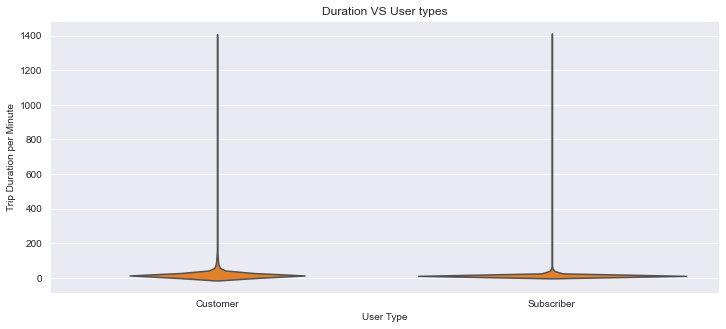

In [46]:
# Plotting violin plots to compare for each user type via seaborn lib:
base_color = sb.color_palette()[1]
sb.violinplot(data=ford_bike_share, x="user_type", y="duration_in_minutes", color=base_color, inner=None);
plt.xlabel("User Type");
plt.ylabel("Trip Duration per Minute");
plt.title("Duration VS User types");

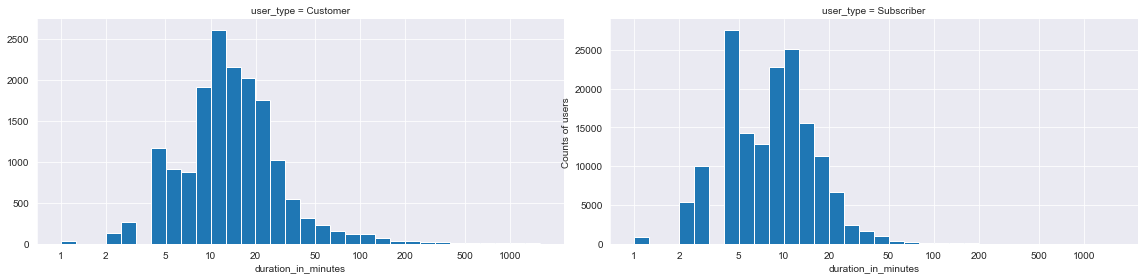

In [47]:
# Plotting using faceted graph for User types Vs Duration per minutes:
bin_edges = 10 ** np.arange(0.0, np.log10(ford_bike_share.duration_in_minutes.max())+0.1, 0.1)

ut = sb.FacetGrid(data = ford_bike_share, col = "user_type", height=4, aspect=2, 
                 col_order = None, sharey=False, sharex= True, margin_titles=False)
ut.map(plt.hist, "duration_in_minutes", bins = bin_edges)
plt.xscale("log")
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.ylabel("Counts of users");

> **Visual insight:**

**Subscriber user type:**

Duration of trips for Subscribers mostly in range (5-12) minutes. while:

**Customer user type**

Mostly rode in range (8-20) minutes which surprisingly is longer range . Also customers seems likely to last more than one hour compared to subscribers.

It seems like subscribers have a more specific usage or targeted porpused riding the bikes compared to customers who vary more.

### 2- User type Vs Date [day of the week]:

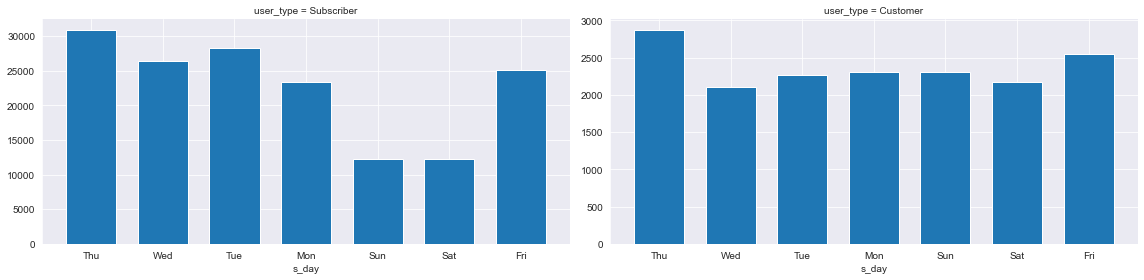

In [48]:
# facetting histograms of user type against start day of week to compare patterns of usage
bin_edges = np.arange(-0.5, 6.5+1, 1)
g = sb.FacetGrid(data = ford_bike_share, col = "user_type",
                 height=4, aspect=2, 
                 col_order = ford_bike_share["user_type"].value_counts().index,
                 sharey=False)
g.map(plt.hist, 's_day', bins = bin_edges, rwidth = 0.7);
plt.xticks(np.arange(0, 6+1, 1));

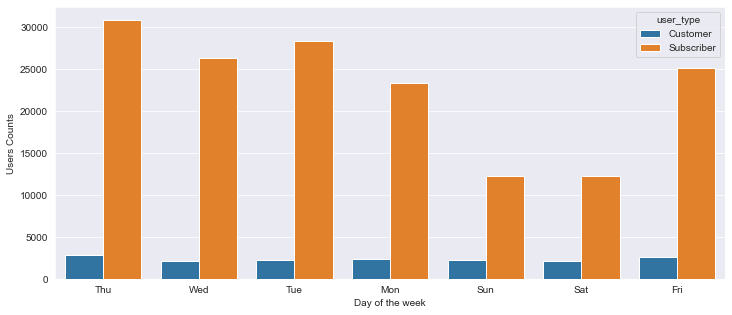

In [49]:
# Plotting countplot to compare numbers of users throw every week's day
sb.countplot(data=ford_bike_share, x="s_day", hue="user_type");
plt.xlabel("Day of the week");
plt.ylabel("Users Counts");

> **Visual insight:**

**Customers**

seem to have a roughly uniform pattern of using the "ford gobike" service through all weekdays. while


**Subscribers **

seem to have a dual pattern of using the "ford gobike" service through all weekdays, large amount of subscribers uses the service through [Mondays - fridays] but on [Suterdays- Sundays] number of subscribers who uses the service falls down, which supports the hypothesis of "going to work" as a main motive for subscribers.

### 3- User type Vs Age:

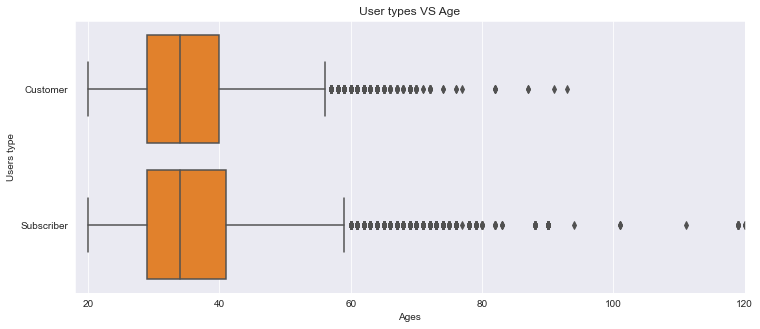

In [50]:
# Plotting boxplots to show relation between user type and age, also i will crop the age range from 18 to 100 years
sb.boxplot(data = ford_bike_share, y = "user_type", x = "user_age", color = base_color, orient= "h")
plt.xlim([18, 120])
plt.ylabel("Users type")
plt.xlabel("Ages")
plt.title("User types VS Age")
plt.show();

> **Visual insight:**

**Subscribers**

seem not only slightly older than customers, but also they have a wider range of ages as well.

### 4- User type Vs Gender:

In [51]:
# Finding the proportions of each gender for each user type programatically 
lgbt= ford_bike_share.query("member_gender == 'Other'")
lgbt.user_type.value_counts(normalize= True)

Subscriber    0.876611
Customer      0.123389
Name: user_type, dtype: float64

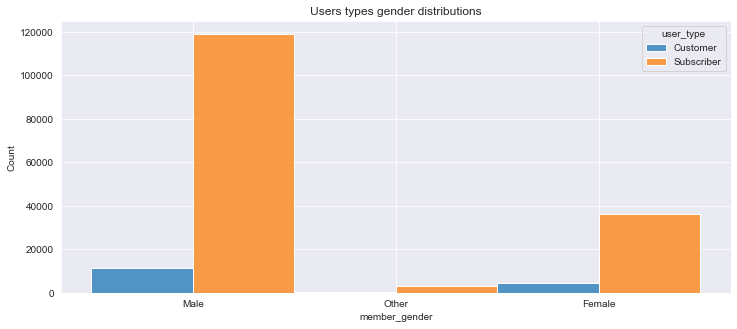

In [52]:
# Plotting hist catplots and using colors to demonestrate the distribution of each gender 
sb.histplot(data=ford_bike_share, binwidth=0.5,
             x="member_gender", hue="user_type",
             stat="count", multiple="dodge", cbar= True);
plt.title("Users types gender distributions");

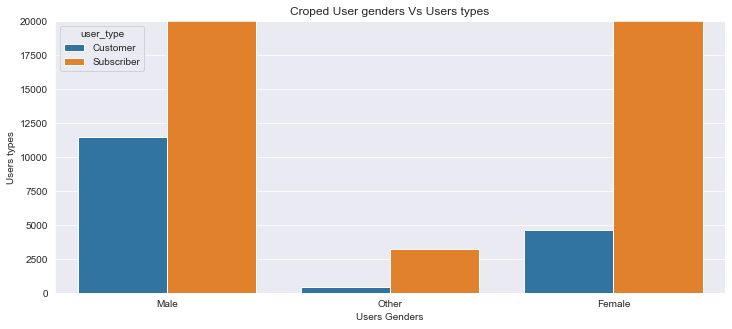

In [53]:
# Plotting croped countplot to compare numbers of users throw the every gender
sb.countplot(data=ford_bike_share, x="member_gender", hue="user_type");
plt.xlabel("Users Genders");
plt.ylabel("Users types")
plt.ylim(0, 20000)
plt.title("Croped User genders Vs Users types");

> **Visual insight:**

**Subscribers**

seem more diversitive, they are males ,females and other, also customers have the same diversity: males and females with slightly higher proportion for females than the subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribers' Durations of trips mostly in range (5-12) minutes. while Customers Mostly rode in range (8-20) minutes which surprisingly is longer range . Also customers seems likely to last more than one hour compared to subscribers.
It seems like subscribers have a more specific usage or targeted purposed riding the bikes compared to customers who vary more.

> while Customers seem to have a roughly uniform pattern of using the "ford gobike" service through all weekdays: Subscribers seem to have a dual pattern of usage.

> large amount of subscribers uses the service through [Mondays - fridays] but on [Saturdays- Sundays] number of subscribers falls down, which supports the hypothesis of "going to work" as a main motive for subscribers.

> Subscribers seem not only slightly older than customers, but also they have a wider range of ages as well.

> Both Subscribers and customers seem diversitive, they are males ,females and other, yet customers slightly have higher proportion of females than the subscribers have.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I didn't !

## Multivariate Exploration


> I will keep going with the "User" prospective so i will explore:

- User types Vs Ages Vs Genders.

- Ages Vs Genders Vs Durations per minutes.

### 1- User type VS Users ages VS Genders :

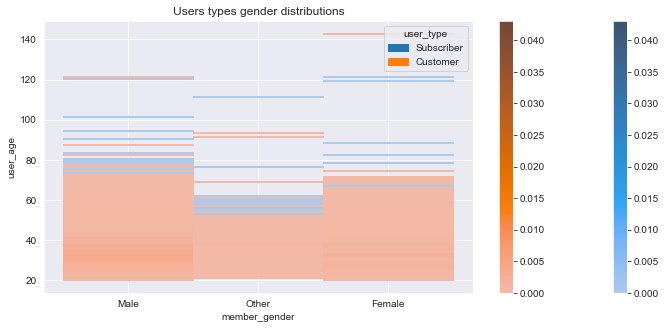

In [54]:
# Plotting catplot to demonstrate the relation between type, age, and gender:
sb.histplot(data=ford_bike_share, binwidth=0.5,
             x="member_gender", y= "user_age",
            hue="user_type", hue_order= ford_bike_share["user_type"].value_counts().index,
            element= "bars",
             stat="probability", multiple="dodge", cbar= True);
plt.title("Users types gender distributions");

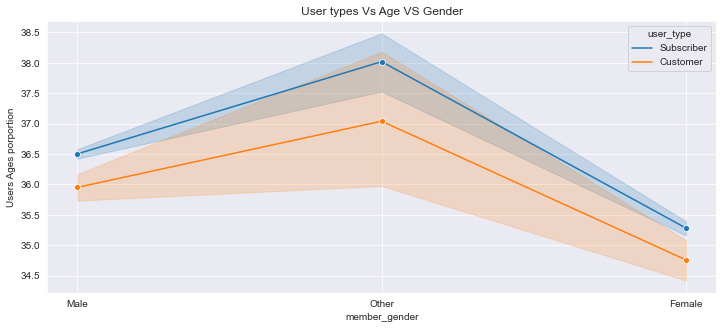

In [55]:
# plotting lineplot to crop the image of relation between user types and age and gender:
sb.lineplot(data = ford_bike_share, x="member_gender", y="user_age", hue="user_type",
            hue_order= ford_bike_share["user_type"].value_counts().index ,
            marker='o', sort= True, ci= 99)
ticks= ford_bike_share.member_gender.value_counts().index
plt.xticks(ticks, ticks)
plt.ylabel("Users Ages porportion")
plt.title("User types Vs Age VS Gender");

> **Visual insight:**

**Subscribers**

generally seem to have higher rates of ages among all types of genders, also females generally seem to be among younger subscribers and customers. we can have a deeper look in the following graph.

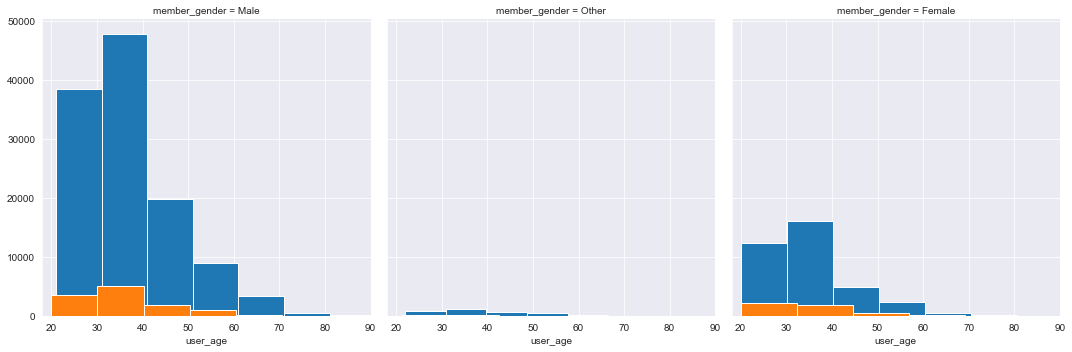

In [56]:
# Plot the Seaborn's FacetGrid to have a deeper look on age , gender and user type:

g = sb.FacetGrid(data = ford_bike_share, col = "member_gender", sharex=True,
               sharey=True, aspect=1, height=5,
                hue= "user_type", hue_order= ford_bike_share["user_type"].value_counts().index,
                col_wrap= 3, legend_out= False,
                 xlim=(18, 90),  margin_titles=True
                );
g.map(plt.hist, "user_age");

> Visual insight:

- Generally the range of ages of males ages is ( 20-60) for subscribers and suctomers, while most of "other" gender type subscribers in range ( 22- 58), also females in range (20 - 60) for both subscribers and customers same as males.

- I will separate the users' counts of each gender type to have a deeper look. 

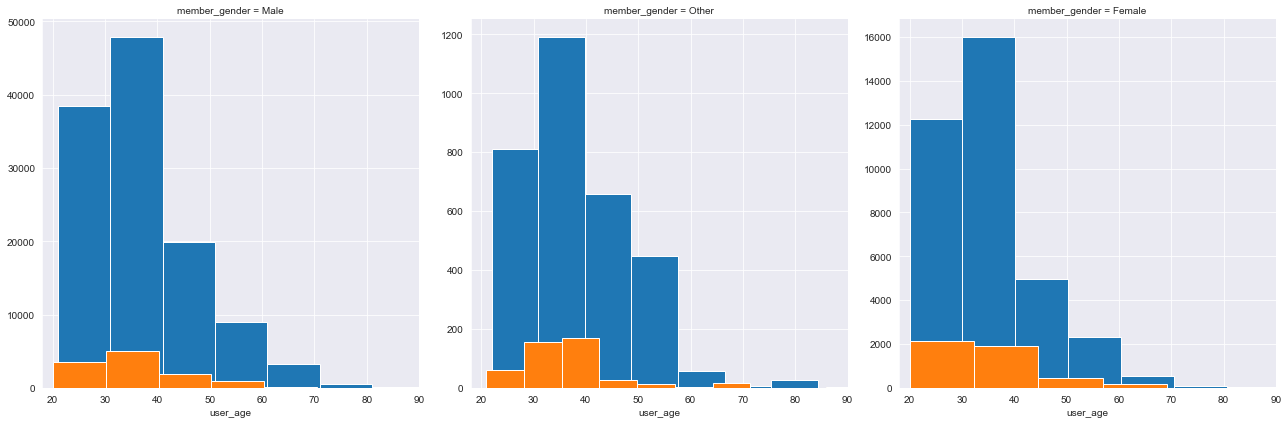

In [57]:
# Plot the Seaborn's FacetGrid to have a deeper look on age , gender and user type:

g = sb.FacetGrid(data = ford_bike_share, col = "member_gender", sharex=True,
               sharey=False, aspect=1, height=6,
                hue= "user_type", hue_order= ford_bike_share["user_type"].value_counts().index,
                col_wrap= 3, legend_out= False,
                 xlim=(18, 90),  margin_titles=True);
g.map(plt.hist, "user_age");

> **Visual insight:**

- Customers with genders types: Male and Other. seem slightly younger than subscribers with the same types, while both subscribers and customers females have the same younger ages ranges.

- Female customers in range (20-30) seems to be the peak of female customers while female subscribers peak seems to be in range (30-40) same as males customers and subscribers also same as "other" gender type peak.

### 2- Users ages VS Genders VS Duration :

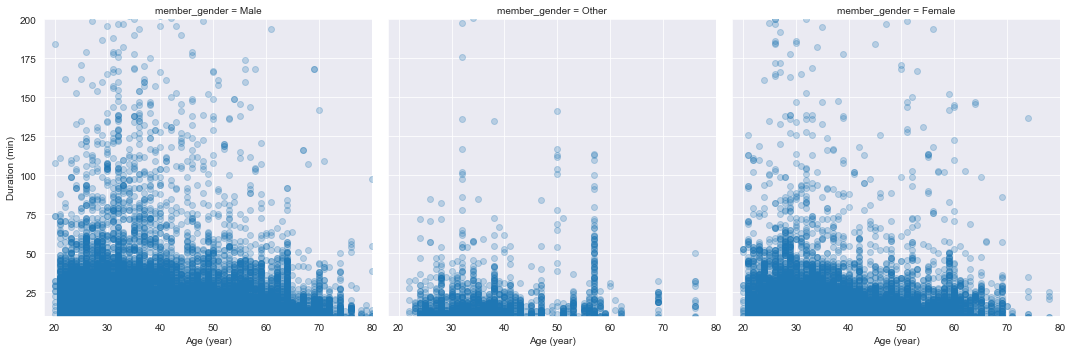

In [58]:
# Plotting facetgrid to explore the multivariables altogether:
user_type = sb.FacetGrid(data = ford_bike_share, col = "member_gender", col_wrap = 3, size = 5,
                 xlim = [18, 80], ylim = [10, 200])
user_type.map(plt.scatter, "user_age", "duration_in_minutes", alpha=0.25)
user_type.set_xlabels("Age (year)")
user_type.set_ylabels("Duration (min)");

> **Visual insight:**

- Generally both Males and females in range (20-60) have the same pattern of trips durations (right skewed curve shape) which means that length of trip duration has inversely proportional relationship with Age while the "other" type gender has a unique bimodal pattern (has two peaks in range (30-40) and range (55-60). 

i will crop the graph to have a deeper understanding of these patterns.

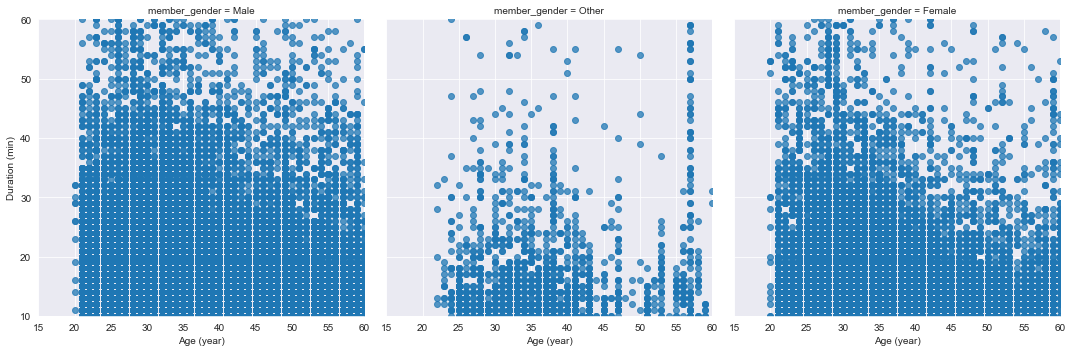

In [59]:
# Adjusting the previous plot:
user_type = sb.FacetGrid(data = ford_bike_share, col = "member_gender", col_wrap = 3, size = 5,
                 xlim = [15, 60], ylim = [10, 60], sharex=[False])
user_type.map(plt.scatter, "user_age", "duration_in_minutes", alpha=0.75)
user_type.set_xlabels("Age (year)")
user_type.set_ylabels("Duration (min)");

> **Visual insight:**

- Males trips durations last for more than (35 minutes) length in range (20-53) years old, while femals' lasts for the same length in range (20-45) years old. also both males and females trips durations last for (20 minutes) length in the same age range (20-60) years old.

- "Other" gender type has a unique dual pattern, durations of trips mostly last for (20 minutes) in range (24- 41) years old, but in range (55-60) years old surprisingly trips durations lasts for more than (50 minutes) , which seems an outlier for the "Other" gender type but it seem normal pattern as it is for both males and females.

the next graph will focus on outliers and special cases.

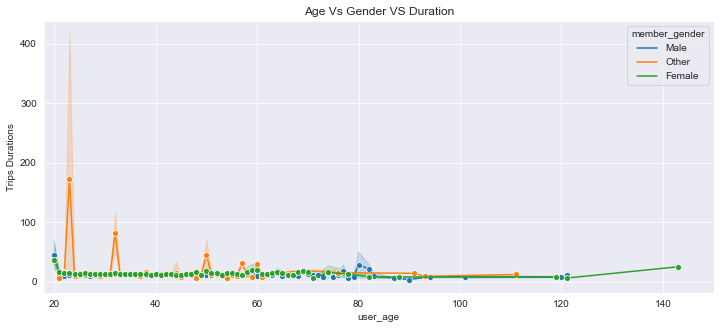

In [60]:
# Plotting linplot to demonstrate outliers of usage patterns:

sb.lineplot(data = ford_bike_share, x="user_age",
            y="duration_in_minutes",
            hue="member_gender", marker='o')
plt.xlim(18, 150)

plt.ylabel("Trips Durations")
plt.title("Age Vs Gender VS Duration");

> **Visual insight:**

- Generally "Other" gender type has the longest trip durations which can last for (400) minutes
- Users older than (100 years old) almost females and "Other"s gender type.

In the following graph i will crop more to focus on longest trips durations.

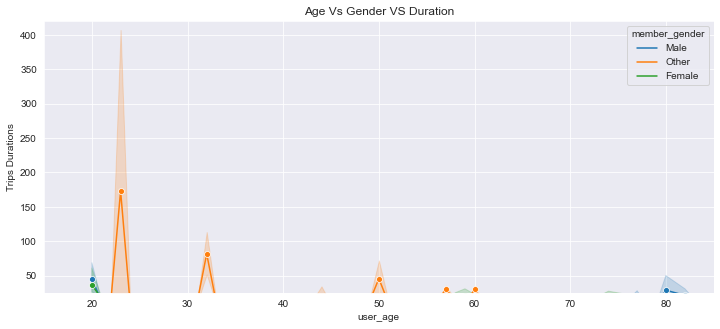

In [61]:
# Plotting lineplot but i will raise the trip duration range to start from 25 minutes and will decrease the age range to 85:
sb.lineplot(data = ford_bike_share, x="user_age", y="duration_in_minutes", hue="member_gender", marker='o')
plt.xlim(15, 85)
plt.ylim(25, 420)
plt.ylabel("Trips Durations")
plt.title("Age Vs Gender VS Duration");

> **Visual insight:**

- It is obvious that the "Other" gender type has the longest trip durations which can last for (400) minutes and has the majority of longer than (40 minutes) trips durations.

In the following graph i will crop more to focus on oldest users.

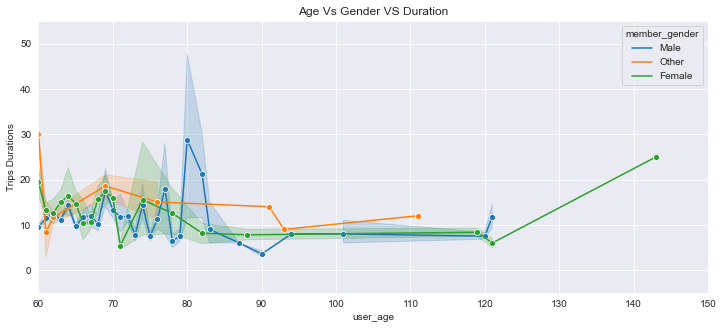

In [62]:
# Same lineplot with adjusted age range and trips durations:
sb.lineplot(data = ford_bike_share, x="user_age", y="duration_in_minutes", hue="member_gender", marker='o')
plt.xlim(60, 150)
plt.ylim(-5, 55)

plt.ylabel("Trips Durations")
plt.title("Age Vs Gender VS Duration");

> **Visual insight:**

- All of member gender types trips durations lasts for (30 minutes) in range (60-80) years old.
- Males has the longest trips durations in range (77 - 83) years old with more than (40 minutes) durations length.
- Female users are the majority of users older than (90) years old with the longest trips durations (almost 25 minutes).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Generally the ages ranges of all genders is (20-60) for subscribers and customers.

- Subscribers generally seem to have higher rates of ages among all types of genders; also females generally seem to be among younger subscribers and younger customers.

- Female customers in range (20-30) seems to be the peak of female customers while female subscribers peak seems to be in range (30-40) same as both: males and the "Other gender type" customers and subscribers' peak (30-40) years old.

- Generally both Males and females in range (20-60) have the same pattern of trips’ durations (right skewed curve shape) which means that length of trip duration has inversely proportional relationship with age while the "Other type gender” has a unique bimodal pattern (has two peaks in range (30-40) and range (55-60).

- All of “member gender types” trips’ durations lasts for (30 minutes) in range (60-80) years old.

- Users older than (100 years old) almost females and "Other gender type”.

- Trips’ durations for males last for more than (35 minutes) length in range (20-53) years old, while females’ lasts for the same length but in range (20-45) years old. Also both males and females trips durations last for (20 minutes) length in the same age range (20-60) years old.

- Males: has the longest trips durations in range (77 - 83) years old with more than (40 minutes) durations length.

- Females users: are the majority of users older than (90) years old with the longest trips durations (almost 25 minutes).

- “Other gender type”: type has a unique dual pattern, durations of trips mostly last for (20 minutes) in range (24- 41) years old, but in range (55-60) years old surprisingly trips durations lasts for more than (50 minutes) , which seems an outlier for the "Other" gender type but it seem normal pattern as it is for both males and females.

- "Other gender type”: has the longest trip durations which can last for (400) minutes.


**IN General** we can say:

- Relationships between multiple variables which plotted are visualized altogether and information are presented combined. Thus I found that “Multivariate exploration” strengthened some of relationships that observed in the previous “Bivariate exploration” also in the “Univariate exploration”.

- Short periods Usage (10-30 minutes) for younger users (20-40 years old) pattern seems correlated to subscriber and younger female customers on workdays specially on rush hours, which supports the "going to work" Hypothesis as a main purpose for using "ford go bike" service.

- Meduim and longer periods usage pattern for both subscribers and customers seems correlated to relaxing and sporting purpose specially with the eldest users.


### Were there any interesting or surprising interactions between features?

> Yes "Other" gender type has the longest trip durations, i expected that males could have it.